#Abstract
The data is related to direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#Information
The data is related to direct marketing campaign direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.
bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).

#Attributes
Input variables:

1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', …, 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

21 - y - has the client subscribed a term deposit? (binary: 'yes','no')


##1. importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
import plotly.express as px
pd.pandas.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

##2. Reading and loading the Dataset

In [ ]:
df=pd.read_csv("/content/bank-additional-full (1).csv")

In [ ]:
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#3.EDA & Data Visualiazation

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
 print('Dataset has 21 features and 41188 rows'.format(df.shape))


Dataset has 21 features and 41188 rows


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Insights:

Most of the features are object type.

In [ ]:
df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
41183    False
41184    False
41185    False
41186    False
41187    False
Length: 41188, dtype: bool

insights:

Dataset has no dupicate values.

In [ ]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Insights:

Dataset has no missing values.

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Insights:

1. The minimum age is 17 and the maximum age is 98.

2. The minimum duration is 0.00 and the maximum duration is 4918.00.

3. minimum campaign performed for the customer is 1 and maximum 56.

4. The minimum and maximum previous contacts are 0 and 7.


In [ ]:
len(df)

41188

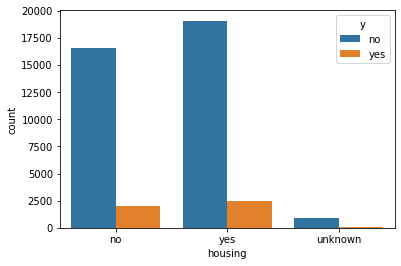

In [ ]:
sn.countplot(x ='housing', hue = "y", data = df)

Insights:

We can see from the above count plot that clients who took out a home loan had the greatest term deposit.

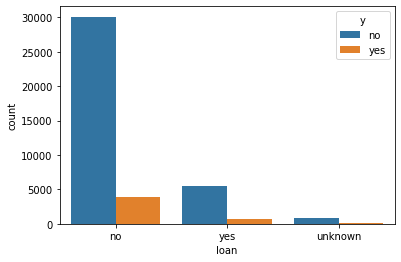

In [ ]:
sn.countplot(x ='loan', hue = "y", data = df)

Insights:

Clients who did not have a personal loan took out the majority of term deposits.


In [ ]:

df1=df[(df.housing=='yes')&(df.y=='yes')& (df.loan=='yes')].count().sample()

In [ ]:
df1

previous    409
dtype: int64

In [ ]:
df2=df[(df.housing=='no')&(df.y=='yes')& (df.loan=='no')].count().sample()

In [ ]:
df2

marital    1752
dtype: int64

Insights :

We can see that clients with housing and personal loans are less likely to take term deposits than clients who do not have any type of loans.

In [ ]:
num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')

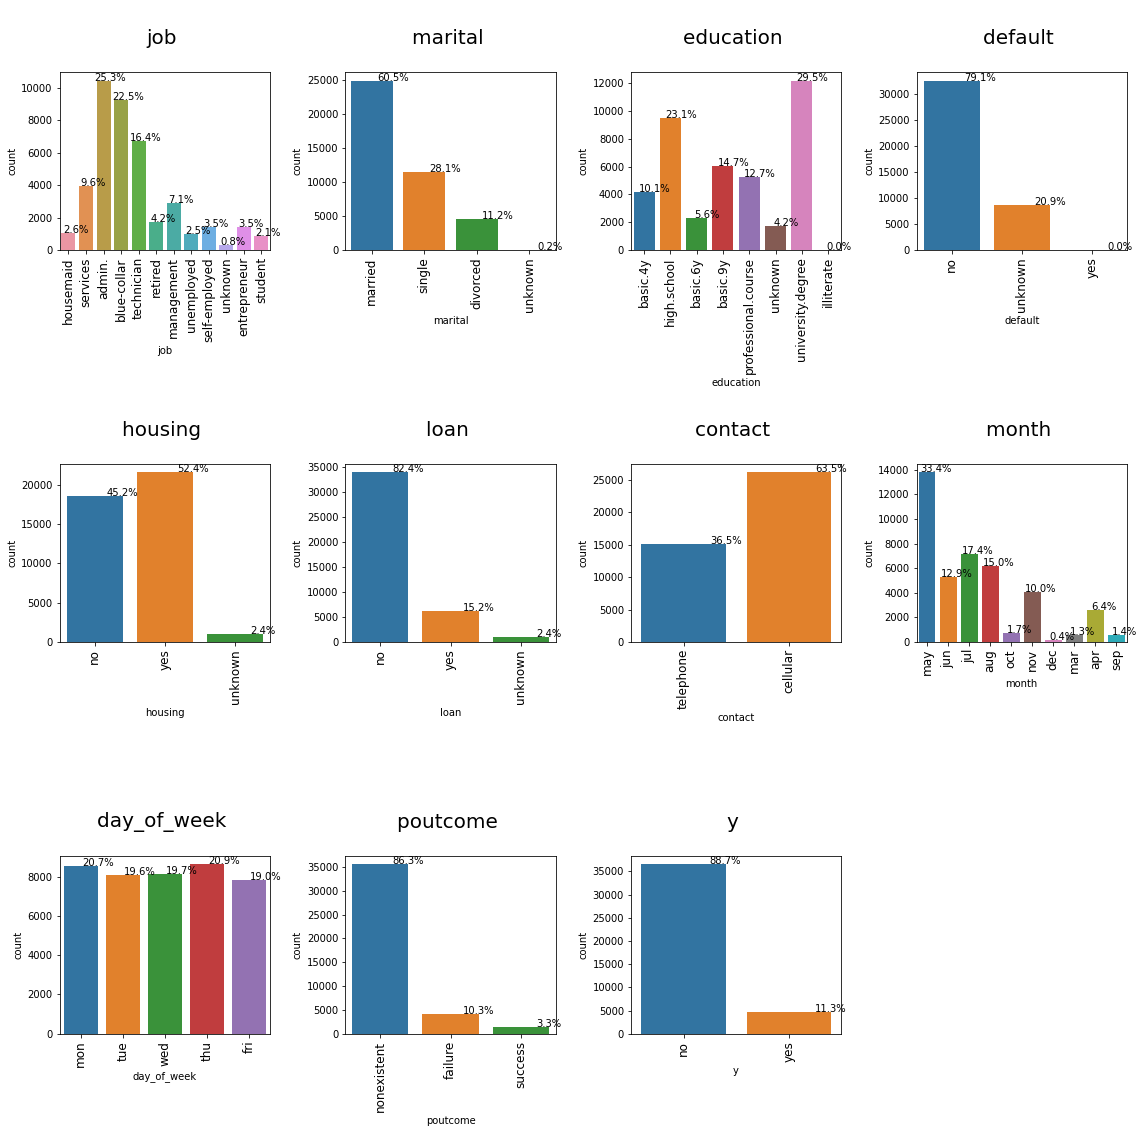

In [ ]:
cols = cat_cols.columns # categorical data analysis

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        total = len(df[cols[i]])
        ax = plt.subplot(4, 4, plotnumber)
        plt.xticks(fontsize = 12, rotation = 90)
        sn.countplot(x = cols[i], data = df , ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y), ha='center')

    plotnumber += 1

plt.tight_layout()
plt.show()

Insights:

1. The top three jobs in the dataset are admin, blue colour, and technician.

2. The dataset contains 60.5% married people.

3. The majority of people have a university degree.

4. The maximum client is not found to be the default.

5. The majority of people have a home loan.

6. The majority of client does not have a personal loan.

7. The majority of clients are contacted via celluler.

8. The majority of clients appear to be contacted in May.

9. High-value clients were contacted on Monday and Thursday.

10. We can conclude from the poutcome that the majority of the content is non-existent which is not giving much of information.

11. In the dependent feature we can see that Maximum clients have not accepted the terms policy.


In [ ]:
fig = px.sunburst(df, path=['marital','y'])
fig.update_traces(textinfo="label+percent parent")
fig.show()

Insights:

1. clients whos marital status is married are 61% where in 10% taken the term policy and 90% has not taken.

2. marital status with single by 28% in which  14% has taken the policy and 86% has not taken.

3. marital status with divorce by 11% in 10 taken the policy and 90 % have not taken the policy.

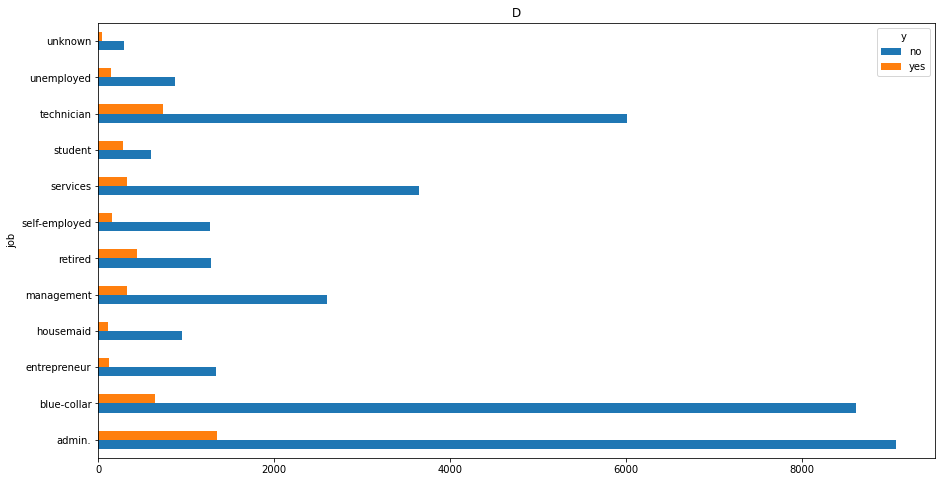

In [ ]:
df3 = df.groupby(['job','y'])['y'].size()
df3 = df3.unstack()

df3.plot(kind= 'barh',figsize=(15,8),title='D');

Insights:

The majority of admin customers have taken out term deposits.

In [ ]:



fig = px.box(df, x="job", y="duration", color="y")
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [ ]:
count_population = df['y'].value_counts()

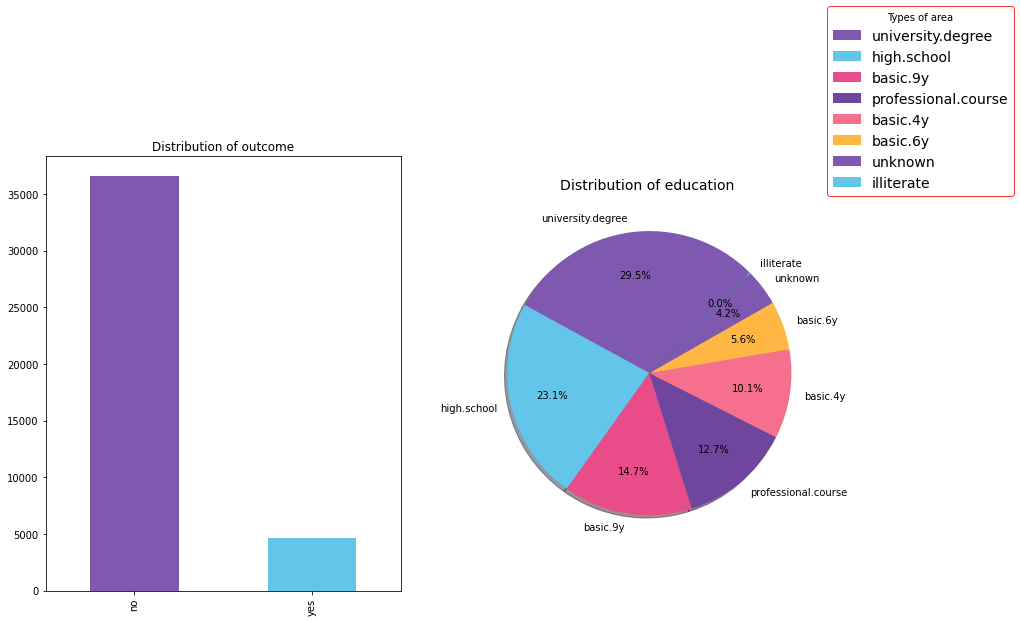

In [ ]:
plt.figure(figsize=(14,8)) # Subplot containing a bar and pie chart
plt.subplot(1,2,1)
plot = count_population.plot(kind='bar', title = "Distribution of outcome",color = ['#7F58AF','#64C5EB','#E84D8A','#6F459E','#F66F8D','#FFB643'])
plt.xticks(fontsize =10 , rotation=90)



plt.subplot(1,2,2)
colors = ['#7F58AF','#64C5EB','#E84D8A','#6F459E','#F66F8D','#FFB643']
plt.pie(list(df['education'].value_counts()),labels = list(df['education'].value_counts().keys()), autopct='%1.1f%%',pctdistance=0.700,startangle = 45,colors = colors,shadow=True)
plt.title("Distribution of education ",fontsize = 14)
plt.legend(loc=(1,1),edgecolor="red",title="Types of area",fontsize = 14)
plt.show()

Insights:

clients from high school have been taken the term deposit.

In [ ]:
fig = px.strip(df, x="campaign", y="duration", color="y")
fig.show()

Insights:

They had a larger likelihood of placing a deposit the longer the calls lasted.

In the early stages of the campaign, there were a lot of positive leads.



##4.Data Pre-Processing & Feature engineering

In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['job']= label_encoder.fit_transform(df['job'])
df['marital']= label_encoder.fit_transform(df['marital'])
df['education']= label_encoder.fit_transform(df['education'])
df['default']= label_encoder.fit_transform(df['default'])
df['housing']= label_encoder.fit_transform(df['housing'])
df['loan']= label_encoder.fit_transform(df['loan'])
df['contact']= label_encoder.fit_transform(df['contact'])
df['month']= label_encoder.fit_transform(df['month'])
df['day_of_week']= label_encoder.fit_transform(df['day_of_week'])
df['poutcome']= label_encoder.fit_transform(df['poutcome'])
df['y']= label_encoder.fit_transform(df['y'])

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:

num_cols = df.select_dtypes(exclude = 'object')
cat_cols = df.select_dtypes(include = 'object')


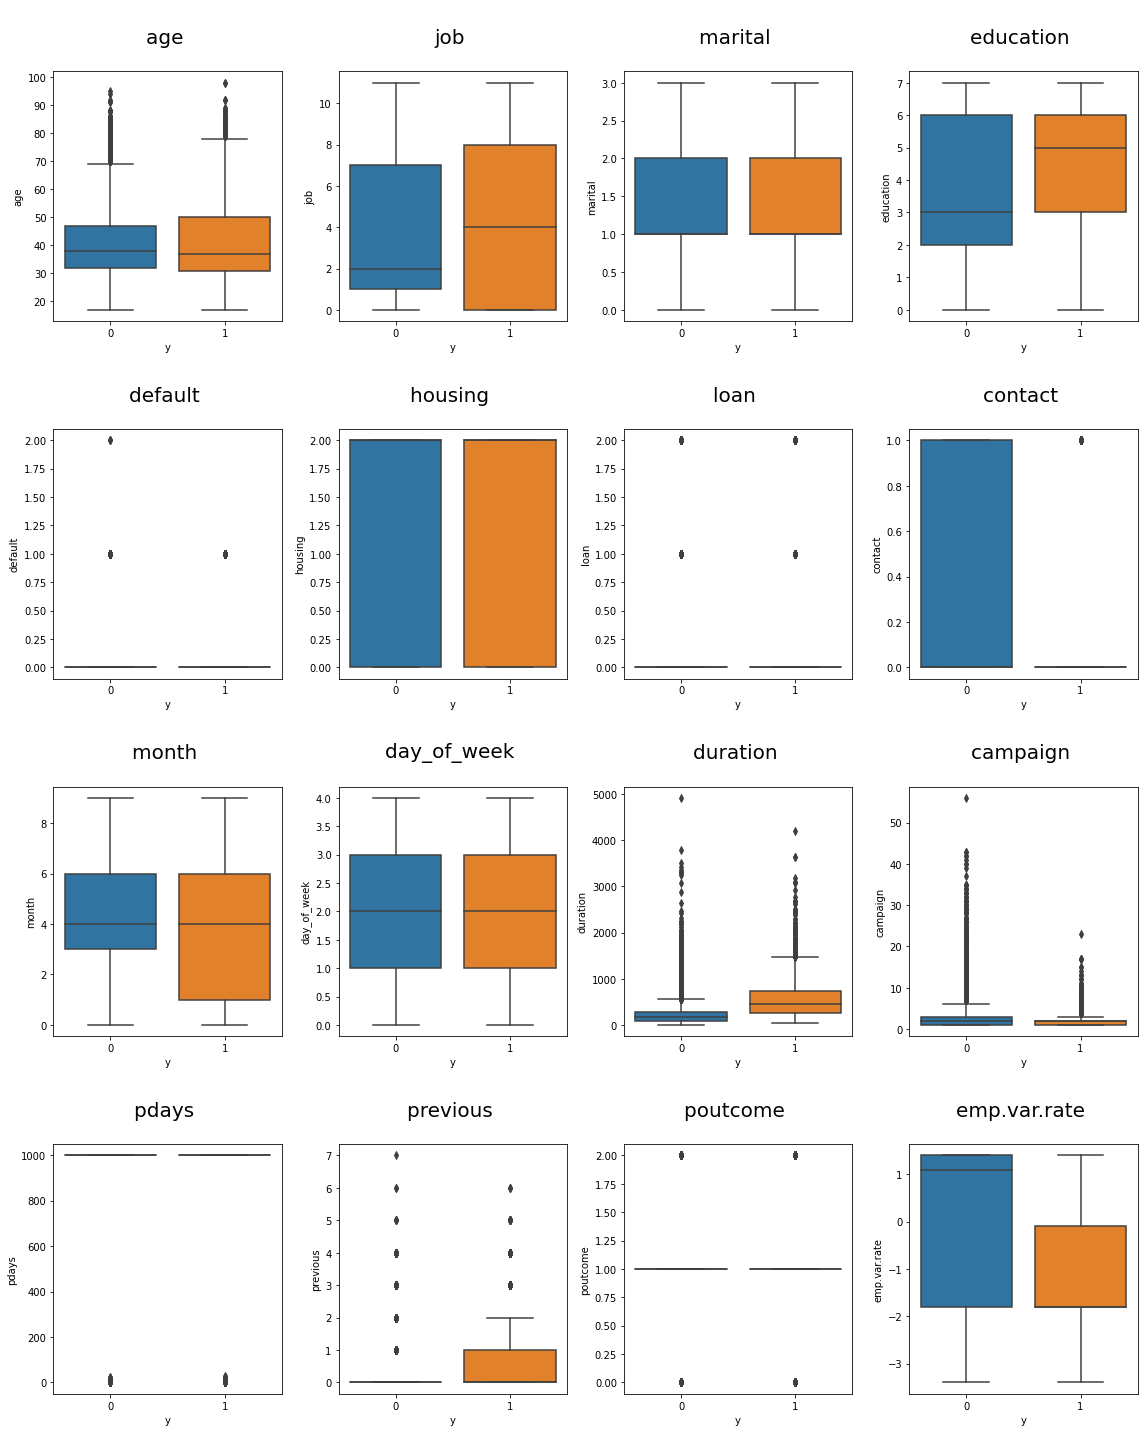

In [ ]:
cols = num_cols.columns

plt.figure(figsize = (16, 20))
plotnumber = 1

for i in range(len(cols)):
    if plotnumber <= 16:
        ax = plt.subplot(4, 4, plotnumber)
        sn.boxplot(x='y',y = cols[i], data = df, ax = ax)
        plt.title(f"\n{cols[i]} \n", fontsize = 20)

    plotnumber += 1

plt.tight_layout()
plt.show()

##5.Feature Scaling

In [ ]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('y',axis=1))
scaled_features = scaler.transform(df.drop('y',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat['y']= df['y']

In [ ]:
df_feat

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.533034,-0.201579,-0.283741,-1.753925,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,0.010471,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
1,1.628993,0.911227,-0.283741,-0.349730,1.945327,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.421501,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
2,-0.290186,0.911227,-0.283741,-0.349730,-0.513600,0.942127,-0.452491,1.31827,0.762558,-0.718834,-0.124520,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
3,-0.002309,-1.036184,-0.283741,-1.285860,-0.513600,-1.087707,-0.452491,1.31827,0.762558,-0.718834,-0.413787,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
4,1.533034,0.911227,-0.283741,-0.349730,-0.513600,-1.087707,2.311440,1.31827,0.762558,-0.718834,0.187888,-0.565922,0.195414,-0.349494,0.192622,0.648092,0.722722,0.886447,0.712460,0.331680,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,3.164336,0.354824,-0.283741,0.586399,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,0.292025,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1
41184,0.573445,-0.757982,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.481012,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41185,1.533034,0.354824,-0.283741,1.054464,-0.513600,0.942127,-0.452491,-0.75857,1.193593,-1.434368,-0.267225,-0.204909,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,0
41186,0.381527,1.467630,-0.283741,0.586399,-0.513600,-1.087707,-0.452491,-0.75857,1.193593,-1.434368,0.708569,-0.565922,0.195414,-0.349494,0.192622,-0.752343,2.058168,-2.224953,-1.495186,-2.815697,1


##5.Decide Dependant and Independant Elements in Data Set

In [ ]:

x=df.drop('y',axis=1)


In [ ]:
y=df['y']

##7. Feature selection

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
X=df.drop(['y'],axis=1)
y=df.y

model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

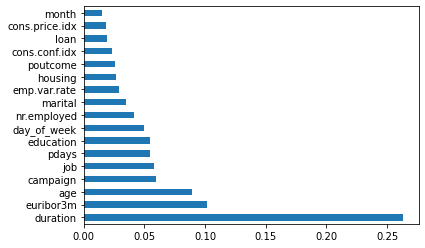

In [ ]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(17).plot(kind='barh')
plt.show()

##6.Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=0)

## Training a Decision Tree Model

Let's start by training a single decision tree first!

** Import DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [ ]:
predictions = dtree.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3665
           1       0.53      0.58      0.55       454

    accuracy                           0.90      4119
   macro avg       0.74      0.76      0.75      4119
weighted avg       0.90      0.90      0.90      4119



In [ ]:
print(confusion_matrix(y_test,predictions))

[[3434  231]
 [ 192  262]]


## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators=600)

In [ ]:
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=600)

## Predictions and Evaluation

Let's predict off the y_test values and evaluate our model.

** Predict the class of not.fully.paid for the X_test data.**

In [ ]:
predictions = rfc.predict(x_test)

**Now create a classification report from the results. Do you get anything strange or some sort of warning?**

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3665
           1       0.63      0.54      0.58       454

    accuracy                           0.91      4119
   macro avg       0.79      0.75      0.77      4119
weighted avg       0.91      0.91      0.91      4119



**Show the Confusion Matrix for the predictions.**


In [ ]:
print(confusion_matrix(y_test,predictions))

[[3522  143]
 [ 211  243]]


[Text(0.5, 0.875, 'X[19] <= 5087.65\ngini = 0.2\nsamples = 37069\nvalue = [32883, 4186]'),
 Text(0.25, 0.625, 'X[10] <= 172.5\ngini = 0.493\nsamples = 4468\nvalue = [2491, 1977]'),
 Text(0.125, 0.375, 'X[14] <= 1.5\ngini = 0.287\nsamples = 1719\nvalue = [1420, 299]'),
 Text(0.0625, 0.125, 'gini = 0.228\nsamples = 1456\nvalue = [1265, 191]'),
 Text(0.1875, 0.125, 'gini = 0.484\nsamples = 263\nvalue = [155, 108]'),
 Text(0.375, 0.375, 'X[12] <= 513.0\ngini = 0.476\nsamples = 2749\nvalue = [1071, 1678]'),
 Text(0.3125, 0.125, 'gini = 0.291\nsamples = 813\nvalue = [144, 669]'),
 Text(0.4375, 0.125, 'gini = 0.499\nsamples = 1936\nvalue = [927, 1009]'),
 Text(0.75, 0.625, 'X[10] <= 607.5\ngini = 0.126\nsamples = 32601\nvalue = [30392, 2209]'),
 Text(0.625, 0.375, 'X[17] <= -46.65\ngini = 0.062\nsamples = 29915\nvalue = [28959, 956]'),
 Text(0.5625, 0.125, 'gini = 0.304\nsamples = 2224\nvalue = [1808, 416]'),
 Text(0.6875, 0.125, 'gini = 0.038\nsamples = 27691\nvalue = [27151, 540]'),
 Text(0

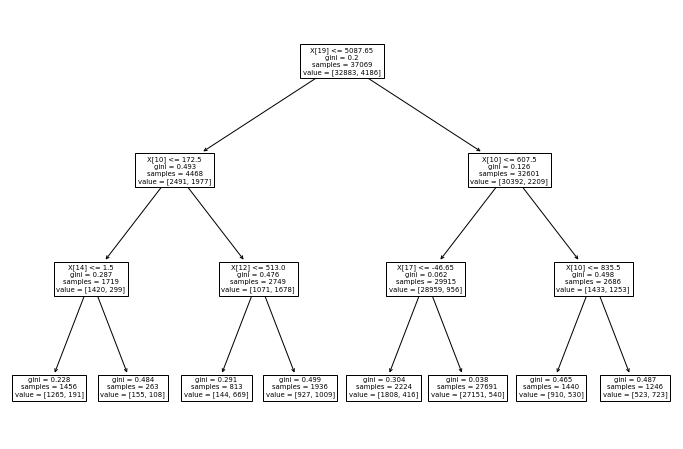

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

[Text(0.5, 0.875, 'X[19] <= 5087.65\nentropy = 0.509\nsamples = 37069\nvalue = [32883, 4186]'),
 Text(0.25, 0.625, 'X[10] <= 158.5\nentropy = 0.99\nsamples = 4468\nvalue = [2491, 1977]'),
 Text(0.125, 0.375, 'X[10] <= 77.5\nentropy = 0.61\nsamples = 1539\nvalue = [1308, 231]'),
 Text(0.0625, 0.125, 'entropy = 0.153\nsamples = 361\nvalue = [353, 8]'),
 Text(0.1875, 0.125, 'entropy = 0.7\nsamples = 1178\nvalue = [955, 223]'),
 Text(0.375, 0.375, 'X[12] <= 16.5\nentropy = 0.973\nsamples = 2929\nvalue = [1183, 1746]'),
 Text(0.3125, 0.125, 'entropy = 0.681\nsamples = 837\nvalue = [151, 686]'),
 Text(0.4375, 0.125, 'entropy = 1.0\nsamples = 2092\nvalue = [1032, 1060]'),
 Text(0.75, 0.625, 'X[10] <= 472.5\nentropy = 0.358\nsamples = 32601\nvalue = [30392, 2209]'),
 Text(0.625, 0.375, 'X[17] <= -46.65\nentropy = 0.158\nsamples = 28343\nvalue = [27689, 654]'),
 Text(0.5625, 0.125, 'entropy = 0.675\nsamples = 2082\nvalue = [1712, 370]'),
 Text(0.6875, 0.125, 'entropy = 0.086\nsamples = 26261\nv

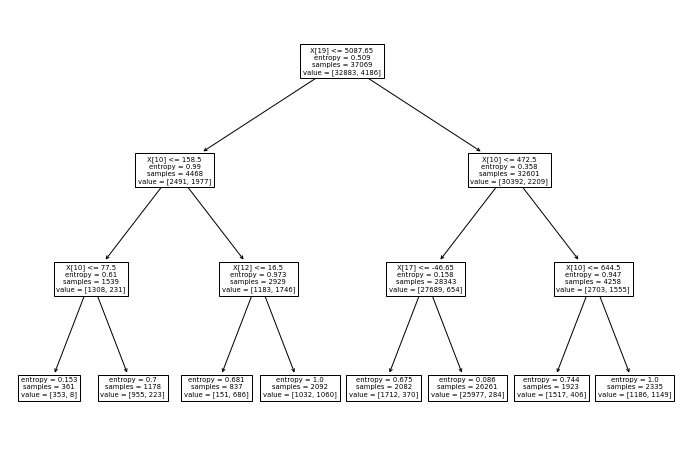

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
# fit the model
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_en.fit(x_train, y_train))

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(x_train, y_train)

evaluate(bagging_clf, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[32883     0]
 [    0  4186]]
ACCURACY SCORE:
1.0000
CLASSIFICATION REPORT:
                 0       1  accuracy  macro avg  weighted avg
precision      1.0     1.0       1.0        1.0           1.0
recall         1.0     1.0       1.0        1.0           1.0
f1-score       1.0     1.0       1.0        1.0           1.0
support    32883.0  4186.0       1.0    37069.0       37069.0
TESTING RESULTS: 
CONFUSION MATRIX:
[[3499  166]
 [ 183  271]]
ACCURACY SCORE:
0.9153
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.950299    0.620137  0.915271     0.785218      0.913908
recall        0.954707    0.596916  0.915271     0.775811      0.915271
f1-score      0.952498    0.608305  0.915271     0.780401      0.914560
support    3665.000000  454.000000  0.915271  4119.000000   4119.000000


In [ ]:
scores = {
    'Bagging Classifier': {
        'Train': accuracy_score(y_train, bagging_clf.predict(x_train)),
        'Test': accuracy_score(y_test, bagging_clf.predict(x_test)),
    },
}

In [ ]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.915270696771061}}

In [ ]:
scores['Random Forest'] = {
        'Train': accuracy_score(y_train, rfc.predict(x_train)),
        'Test': accuracy_score(y_test, rfc.predict(x_test)),
    }

In [ ]:
scores

{'Bagging Classifier': {'Train': 1.0, 'Test': 0.915270696771061},
 'Random Forest': {'Train': 1.0, 'Test': 0.9140568099053168}}

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(x_train, y_train)
evaluate(ada_boost_clf, x_train, x_test, y_train,y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[32017   866]
 [ 2510  1676]]
ACCURACY SCORE:
0.9089
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.927303     0.659323  0.908927      0.793313      0.897042
recall         0.973664     0.400382  0.908927      0.687023      0.908927
f1-score       0.949918     0.498216  0.908927      0.724067      0.898910
support    32883.000000  4186.000000  0.908927  37069.000000  37069.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[3562  103]
 [ 251  203]]
ACCURACY SCORE:
0.9141
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.934173    0.663399  0.914057     0.798786      0.904328
recall        0.971896    0.447137  0.914057     0.709516      0.914057
f1-score      0.952661    0.534211  0.914057     0.743436      0.906539
support    3665.000000  454.000000  0.914057  4119.000000   4119.000000


In [ ]:
scores['AdaBoost'] = {
        'Train': accuracy_score(y_train, ada_boost_clf.predict(x_train)),
        'Test': accuracy_score(y_test, ada_boost_clf.predict(x_test)),
    }

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
grad_boost_clf.fit(x_train, y_train)
evaluate(grad_boost_clf, x_train, x_test, y_train, y_test)

TRAINIG RESULTS: 
CONFUSION MATRIX:
[[31877  1006]
 [ 1886  2300]]
ACCURACY SCORE:
0.9220
CLASSIFICATION REPORT:
                      0            1  accuracy     macro avg  weighted avg
precision      0.944140     0.695705  0.921983      0.819922      0.916086
recall         0.969407     0.549451  0.921983      0.759429      0.921983
f1-score       0.956607     0.613988  0.921983      0.785297      0.917917
support    32883.000000  4186.000000  0.921983  37069.000000  37069.000000
TESTING RESULTS: 
CONFUSION MATRIX:
[[3527  138]
 [ 197  257]]
ACCURACY SCORE:
0.9187
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.947100    0.650633   0.91867     0.798866      0.914423
recall        0.962347    0.566079   0.91867     0.764213      0.918670
f1-score      0.954662    0.605418   0.91867     0.780040      0.916168
support    3665.000000  454.000000   0.91867  4119.000000   4119.000000


In [ ]:
scores['Gradient Boosting'] = {
        'Train': accuracy_score(y_train, grad_boost_clf.predict(x_train)),
        'Test': accuracy_score(y_test, grad_boost_clf.predict(x_test)),
    }

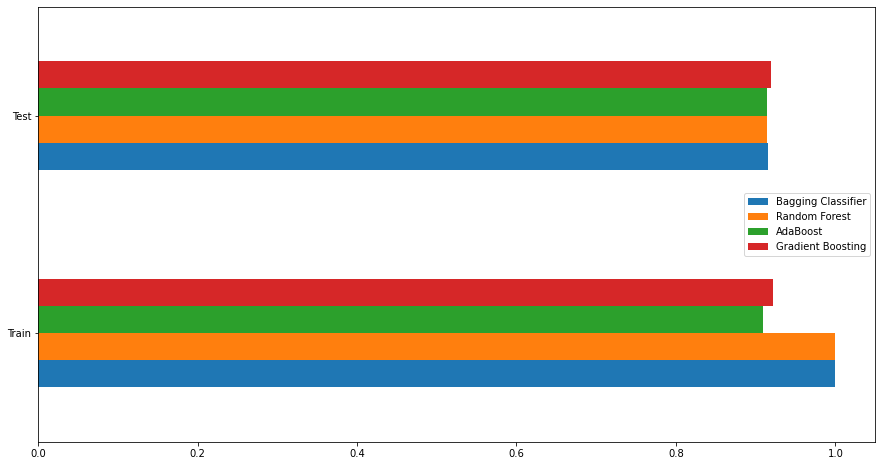

In [ ]:
scores_df = pd.DataFrame(scores)

scores_df.plot(kind='barh', figsize=(15, 8))

## Conclusion:

* Term deposits have been taken out by the vast majority of admin customers.
* 60.5% of the people in the dataset are married.
* The majority of term policies are based on marital status, with single being the most common.
* Clients from high school have made a greater number of term deposits.
* When the call duration is longer during the campaign, more term policies are sold.